**INPUT**

In [1]:
#Importing Necessary Libraries for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the Given Dataset using Pandas
data = pd.read_csv('../input/Power.csv')
#Extracting only the necessary columns from the Dataset for Analysis and Forecast
df = data[['DateTime','LCLid','KWh']]

In [3]:
#Description of The Dataset
include =['object', 'float', 'int']
print("DESCRIPTION")
print(df.describe(include=include))

DESCRIPTION
                           DateTime      LCLid            KWh
count                        999971     999971  999971.000000
unique                        39095         30            NaN
top     2012-10-20 00:00:00.0000000  MAC000018            NaN
freq                             58      39081            NaN
mean                            NaN        NaN       0.239580
std                             NaN        NaN       0.387533
min                             NaN        NaN       0.000000
25%                             NaN        NaN       0.060000
50%                             NaN        NaN       0.129000
75%                             NaN        NaN       0.255000
max                             NaN        NaN       6.528000


In [4]:
#The top five rows of the dataset
print(df.head())

                      DateTime      LCLid  KWh
0  2012-10-12 00:30:00.0000000  MAC000002  0.0
1  2012-10-12 01:00:00.0000000  MAC000002  0.0
2  2012-10-12 01:30:00.0000000  MAC000002  0.0
3  2012-10-12 02:00:00.0000000  MAC000002  0.0
4  2012-10-12 02:30:00.0000000  MAC000002  0.0


In [5]:
#The last five rows of the dataset
print(df.tail())

                           DateTime      LCLid    KWh
999966  2012-11-08 08:00:00.0000000  MAC000036  0.228
999967  2012-11-08 08:30:00.0000000  MAC000036  0.042
999968  2012-11-08 09:00:00.0000000  MAC000036  0.076
999969  2012-11-08 09:30:00.0000000  MAC000036  0.070
999970  2012-11-08 10:00:00.0000000  MAC000036  0.005


**ANALYSIS**

In [6]:
#Creating Data for Analysis
data=df
#Setting the index of the Data to be the HOUSE ID
data.index=data.LCLid
#removing the column LCLid since it has been set as index
data=data.drop('LCLid',axis=1)

In [7]:
data.tail()

,DateTime,KWh
LCLid,,
MAC000036,2012-11-08 08:00:00.0000000,0.228
MAC000036,2012-11-08 08:30:00.0000000,0.042
MAC000036,2012-11-08 09:00:00.0000000,0.076
MAC000036,2012-11-08 09:30:00.0000000,0.070
MAC000036,2012-11-08 10:00:00.0000000,0.005


In [8]:
ids=[]
#The Unique House ids in the Dataset 
ids=data.index.unique()

In [9]:
#Finding the count of samples present for each HouseId
count=[]
c=0
for i in ids:
  c=0
  for j in data.index:
    if i==j:
      c+=1
  count.append(c)

In [10]:
print(len(count))
#The count length is equal to the number of House IDs

30


In [11]:
#A temporary variable to store the count
tcount=count.copy()

In [12]:
#A function to find the top 3 maximum elements in a list
def Nmaxelements(list1, N=3): 
    final_list = [] 
  
    for i in range(0, N):  
        max1 = 0
          
        for j in range(len(list1)):      
            if list1[j] > max1: 
                max1 = list1[j]; 
                  
        list1.remove(max1); 
        final_list.append(max1) 
          
    return final_list 

In [13]:
#The top three sample values present in Dataset
maxim=Nmaxelements(tcount)
print("The top three samples present are "+str(maxim))

The top three samples present are [39081, 39078, 39078]


In [14]:
#finding which house ID is having the top three maximum values from the list ids created previously
label=[]
for i in range(len(maxim)):
  for j in range(len(count)):
    if maxim[i]==count[j]:
      label.append(ids[j])
      count[j]=0
      break

In [15]:
print('THE TOP THREE HOUSEIDs HAVING MAXIMUM SAMPLES ARE '+str(label))

THE TOP THREE HOUSEIDs HAVING MAXIMUM SAMPLES ARE ['MAC000018', 'MAC000020', 'MAC000021']


In [16]:
#selecting only those samples from the Dataset having maximum samples
df_m=pd.DataFrame(df.loc[label,:])

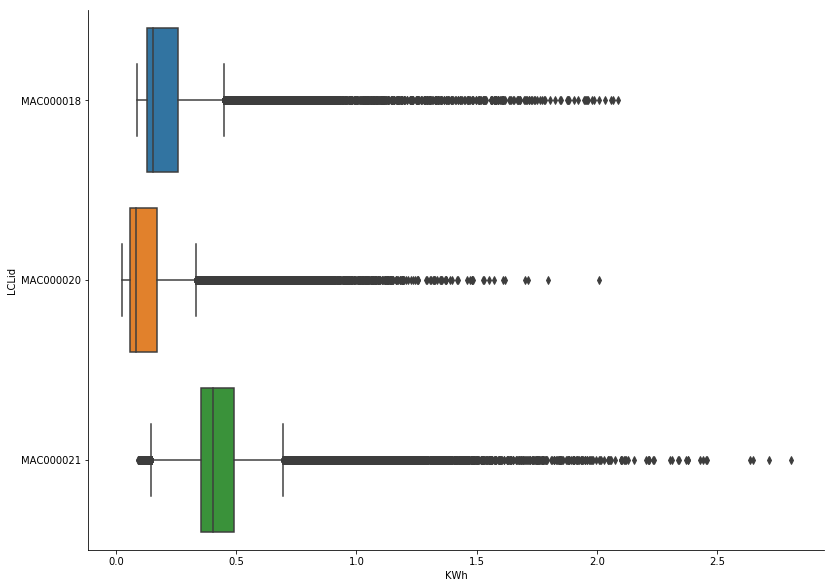

In [17]:
#Visualising the Data of those three HouseIDs
sns.catplot(y="LCLid", x="KWh", kind="box",data=df_m,height=8.27, aspect=11.7/8.27)

In [18]:
#Setting the LCLID as index and removing the column from the data set
df_m=df_m.drop('LCLid',axis=1)

In [19]:
#The Fist five Rows from Dataset
print(df_m.head())

                              DateTime    KWh
LCLid                                        
MAC000018  2011-12-07 09:30:00.0000000  0.303
MAC000018  2011-12-07 10:00:00.0000000  0.200
MAC000018  2011-12-07 10:30:00.0000000  0.218
MAC000018  2011-12-07 11:00:00.0000000  0.209
MAC000018  2011-12-07 11:30:00.0000000  0.210


In [20]:
#The Total consumption of the HouseIDs
energy = df_m.groupby('LCLid')[['KWh']].sum()
energy=  energy.reset_index()
print(energy)

       LCLid           KWh
0  MAC000018   8748.447000
1  MAC000020   5344.030000
2  MAC000021  18323.178001


In [21]:
#The last 5 rows of the dataset
print(df_m.tail())

                              DateTime    KWh
LCLid                                        
MAC000021  2014-02-27 22:30:00.0000000  0.475
MAC000021  2014-02-27 23:00:00.0000000  0.414
MAC000021  2014-02-27 23:30:00.0000000  0.526
MAC000021  2014-02-28 00:00:00.0000000  0.737
MAC000021  2014-02-28 00:00:00.0000000  0.737


In [22]:
#Seperating the Dataset into 3 Different Datasets each having the Maximum sample ID label samples
first=pd.DataFrame(df_m.loc[label[0]])
first.DateTime = pd.to_datetime(first.DateTime,format='%Y-%m-%d %H')
first.DateTime=first.DateTime.dt.strftime('%Y-%m-%d %H:00')
second=pd.DataFrame(df_m.loc[label[1]])
second.DateTime = pd.to_datetime(second.DateTime,format='%Y-%m-%d %H')
second.DateTime=second.DateTime.dt.strftime('%Y-%m-%d %H:00')
third=pd.DataFrame(df_m.loc[label[2]])
third.DateTime = pd.to_datetime(third.DateTime,format='%Y-%m-%d %H')
third.DateTime=third.DateTime.dt.strftime('%Y-%m-%d %H:00')

In [23]:
#Saving the labels for reference
first_label=first.index.unique()
second_label=second.index.unique()
third_label=third.index.unique()

In [24]:
#The first five rows of the First label
print(first.head())

                   DateTime    KWh
LCLid                             
MAC000018  2011-12-07 09:00  0.303
MAC000018  2011-12-07 10:00  0.200
MAC000018  2011-12-07 10:00  0.218
MAC000018  2011-12-07 11:00  0.209
MAC000018  2011-12-07 11:00  0.210


In [25]:
#Grouping the Datasets by Datetime
first=first.groupby('DateTime')[['KWh']].sum()
first=first.reset_index()
second=second.groupby('DateTime')[['KWh']].sum()
second=second.reset_index()
third=third.groupby('DateTime')[['KWh']].sum()
third=third.reset_index()

In [26]:
print(first.head())

           DateTime    KWh
0  2011-12-07 09:00  0.303
1  2011-12-07 10:00  0.418
2  2011-12-07 11:00  0.419
3  2011-12-07 12:00  0.677
4  2011-12-07 13:00  1.335


In [27]:
#Setting the datasets index as Datetime
first=first.set_index('DateTime').asfreq('h')# HOURlY BASIS
second=second.set_index('DateTime').asfreq('h')# HOURlY BASIS
third=third.set_index('DateTime').asfreq('h')# HOURlY BASIS

In [28]:
#To see how the modified Dataset looks like
print(first.head())

                       KWh
DateTime                  
2011-12-07 09:00:00  0.303
2011-12-07 10:00:00  0.418
2011-12-07 11:00:00  0.419
2011-12-07 12:00:00  0.677
2011-12-07 13:00:00  1.335


Index(['MAC000018'], dtype='object', name='LCLid')


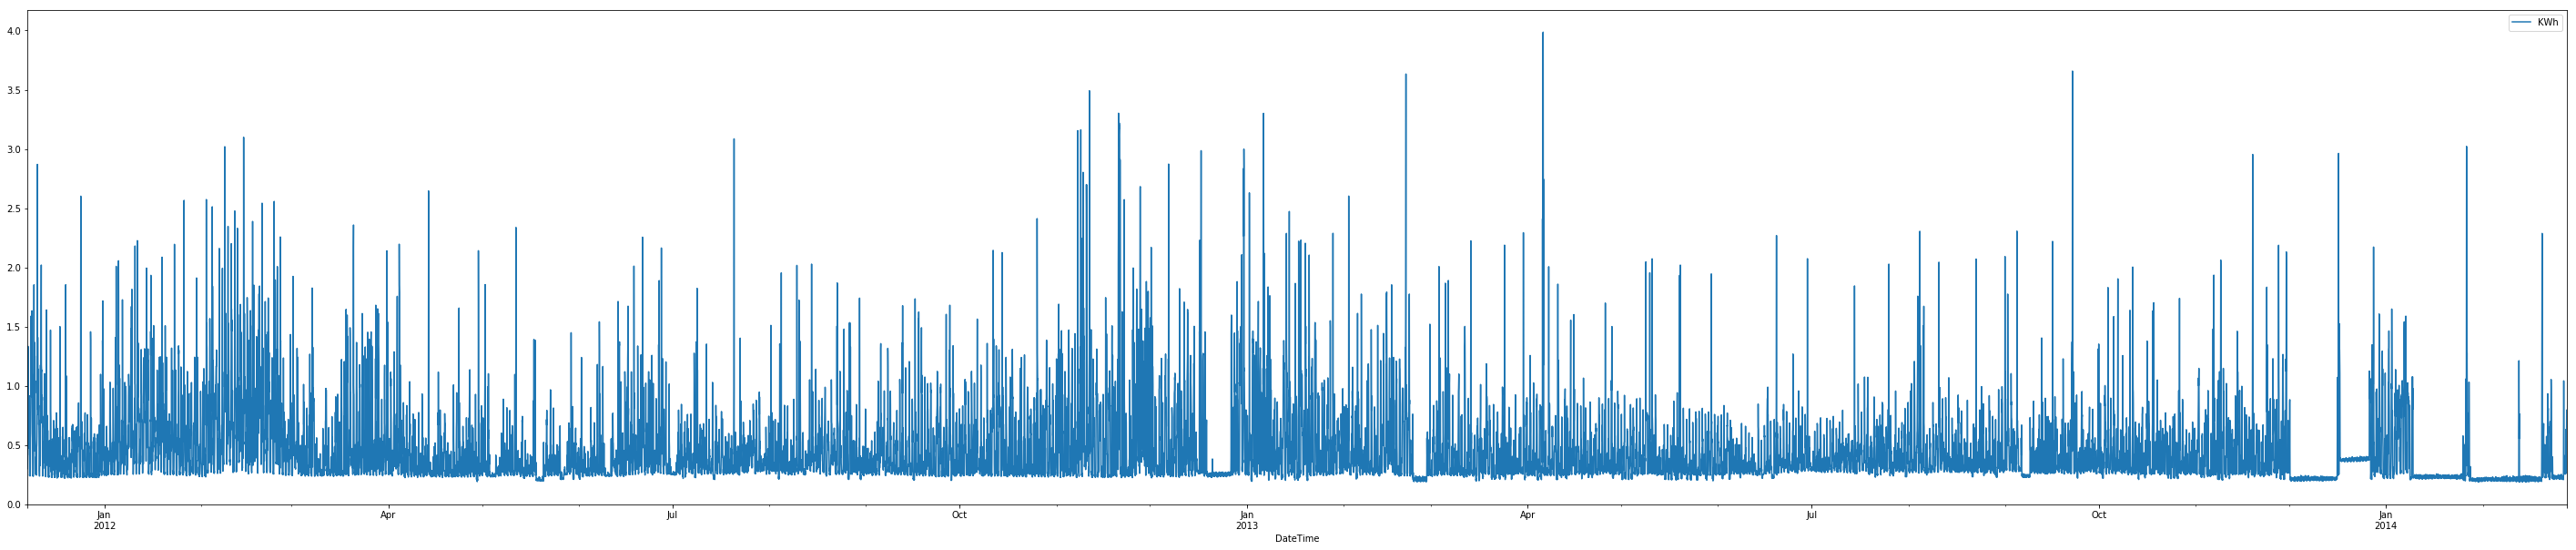

In [29]:
#Plotting the first Dataset of maximum sample HouseID
print(first_label)
first.plot(figsize=(50,10))
plt.show()

Index(['MAC000020'], dtype='object', name='LCLid')


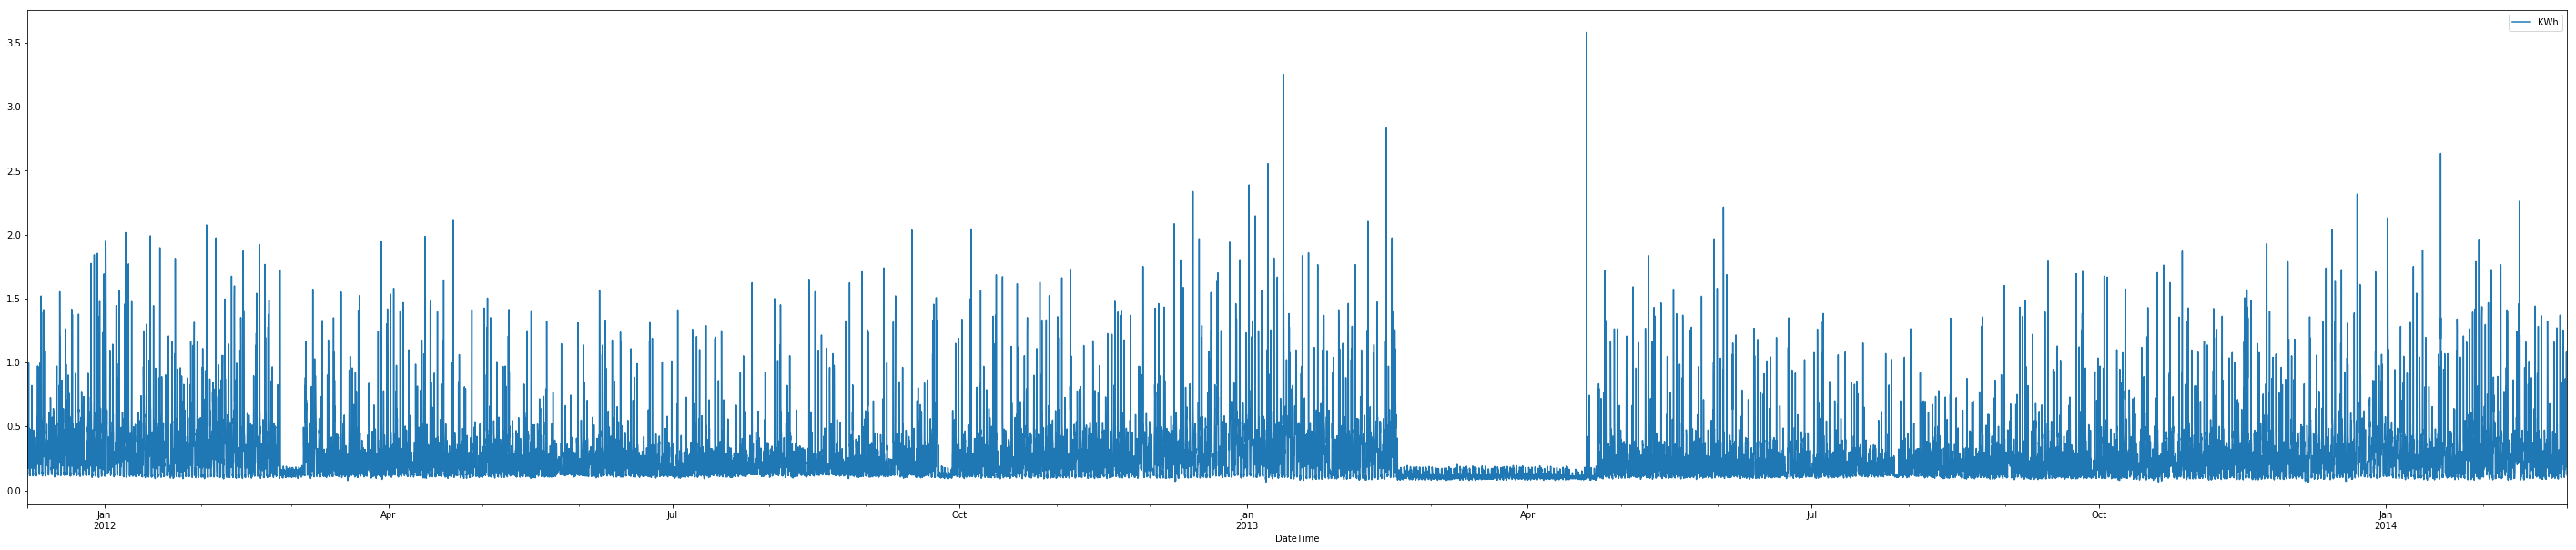

In [30]:
#Plotting the second Dataset
print(second_label)
second.plot(figsize=(50,10))
plt.show()

Index(['MAC000021'], dtype='object', name='LCLid')


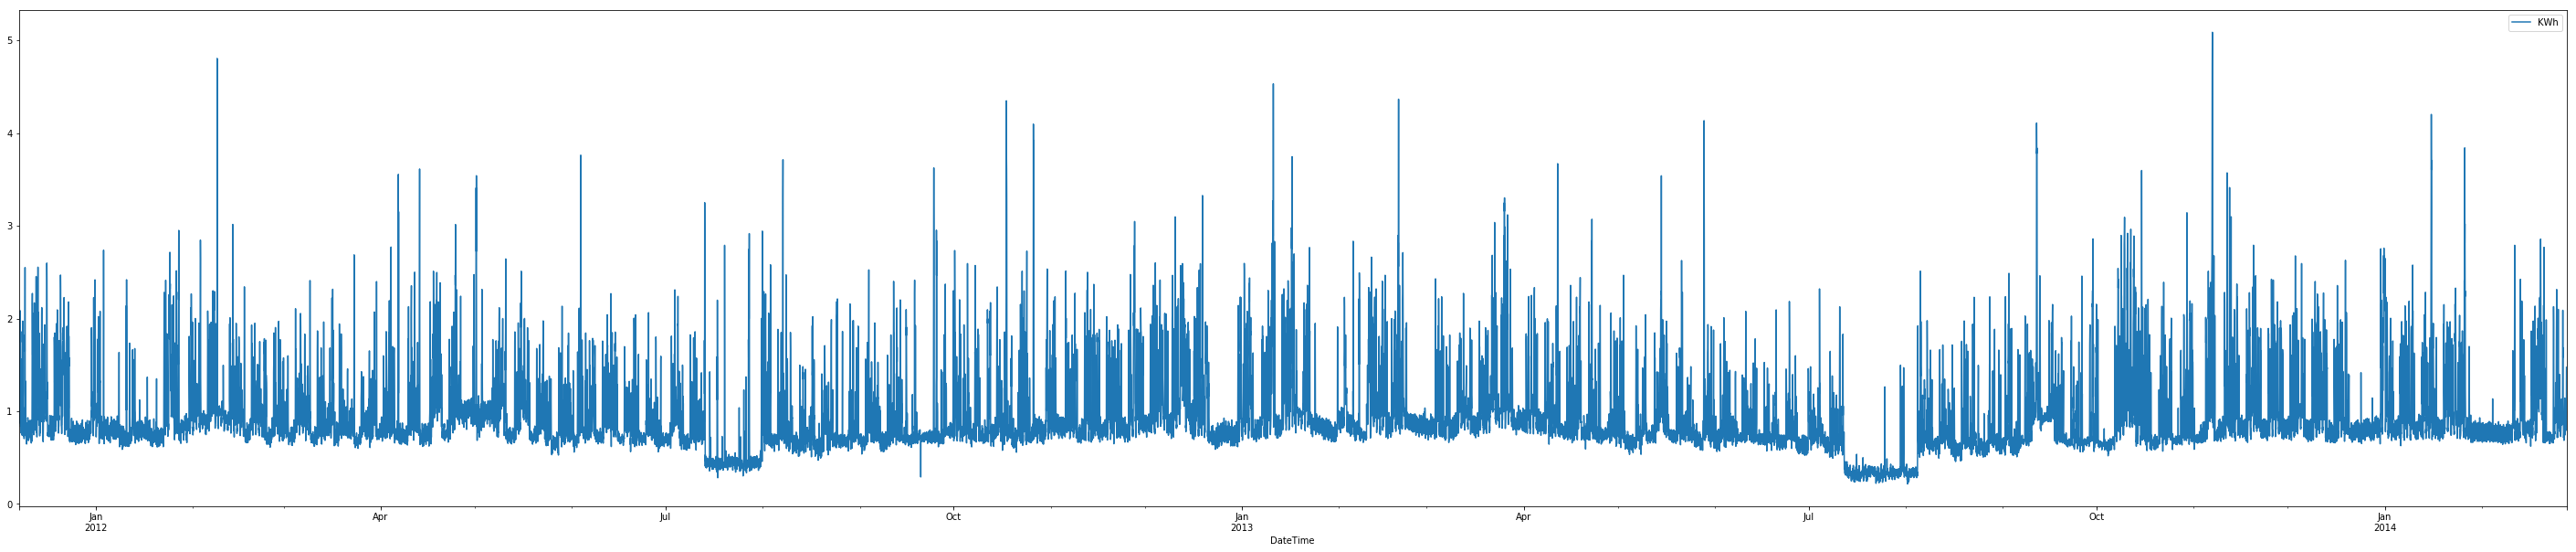

In [31]:
#Plotting the third Dataset
print(third_label)
third.plot(figsize=(50,10))
plt.show()

**Plotting the Rolling Mean and Standard Deviation of each HouseID**

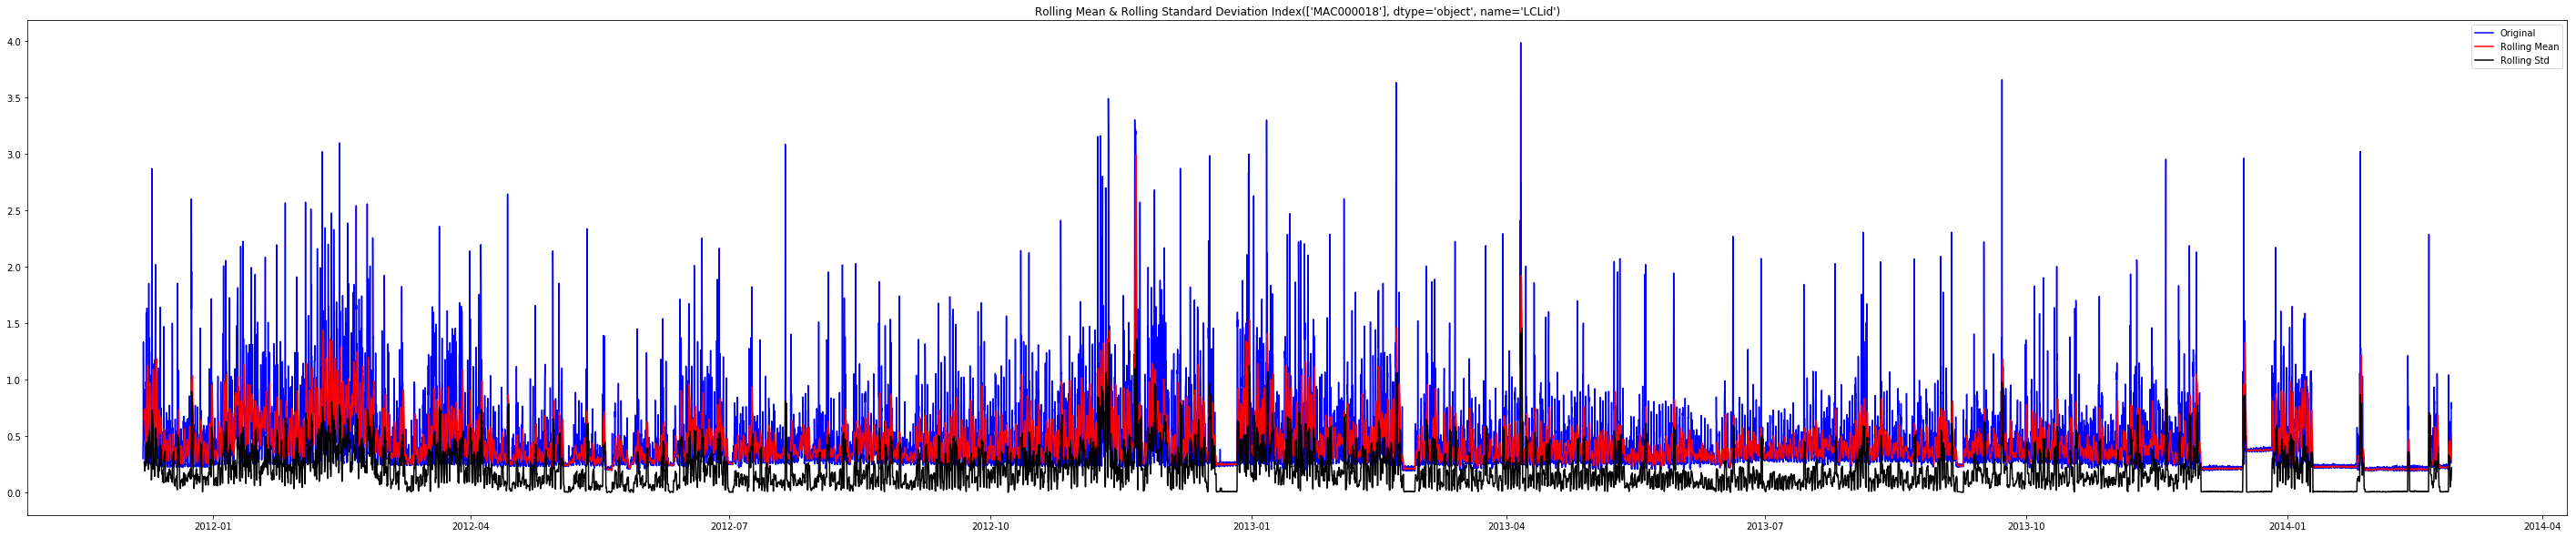

In [32]:
rolling_mean = first.rolling(window = 12).mean()
rolling_std = first.rolling(window = 12).std()
plt.figure(figsize=(50,10))
plt.plot(first['KWh'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation %s'%(first_label))
plt.show()

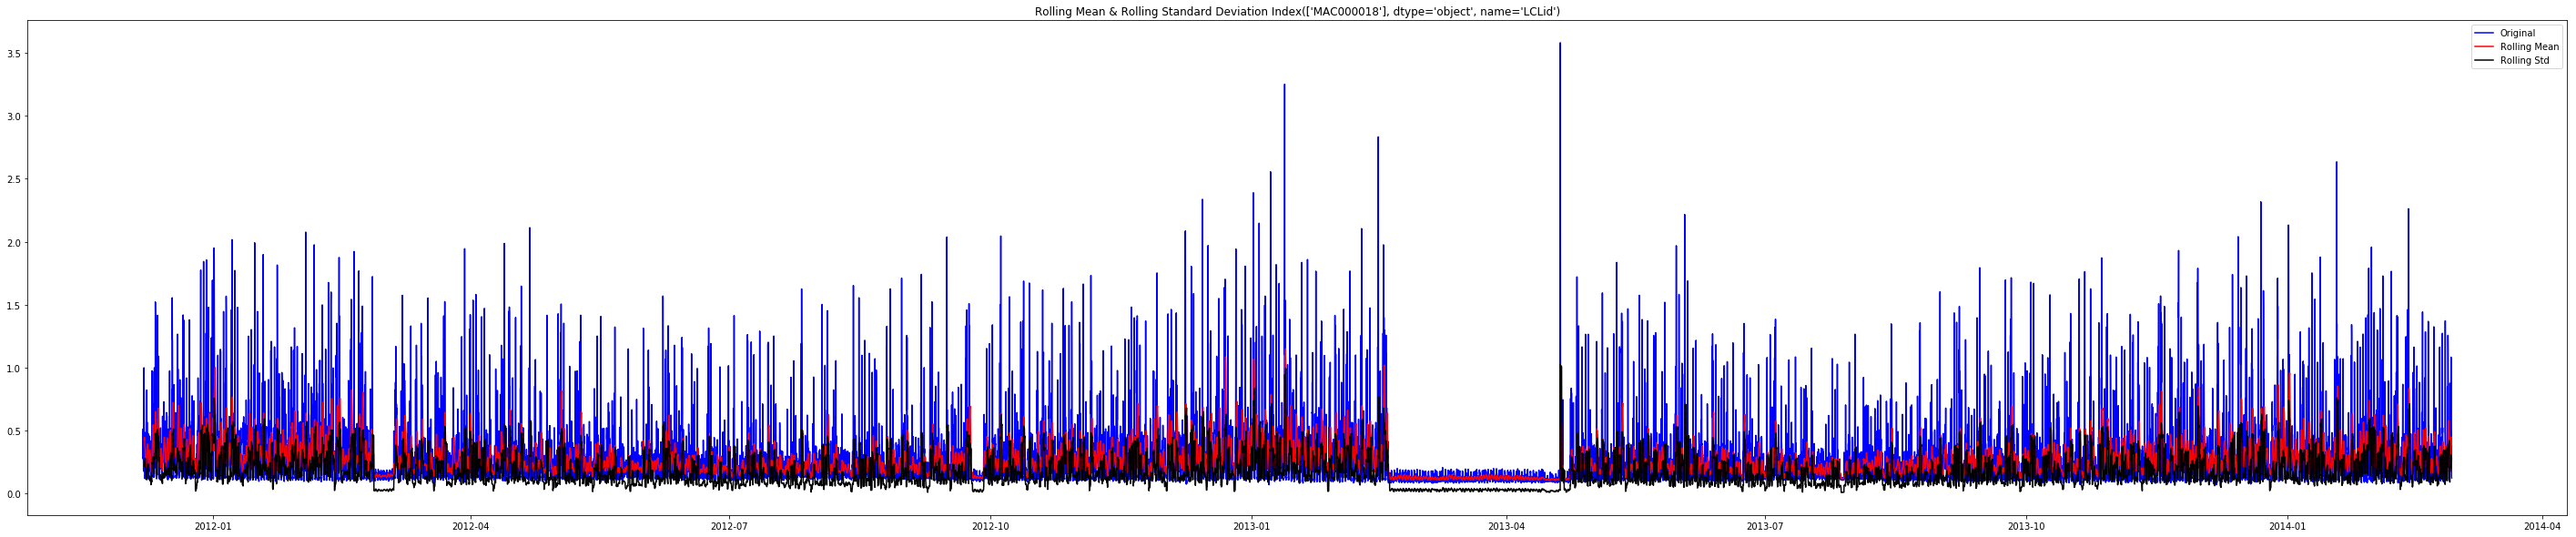

In [33]:
rolling_mean = second.rolling(window = 12).mean()
rolling_std = second.rolling(window = 12).std()
plt.figure(figsize=(50,10))
plt.plot(second['KWh'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation %s'%(first_label))
plt.show()

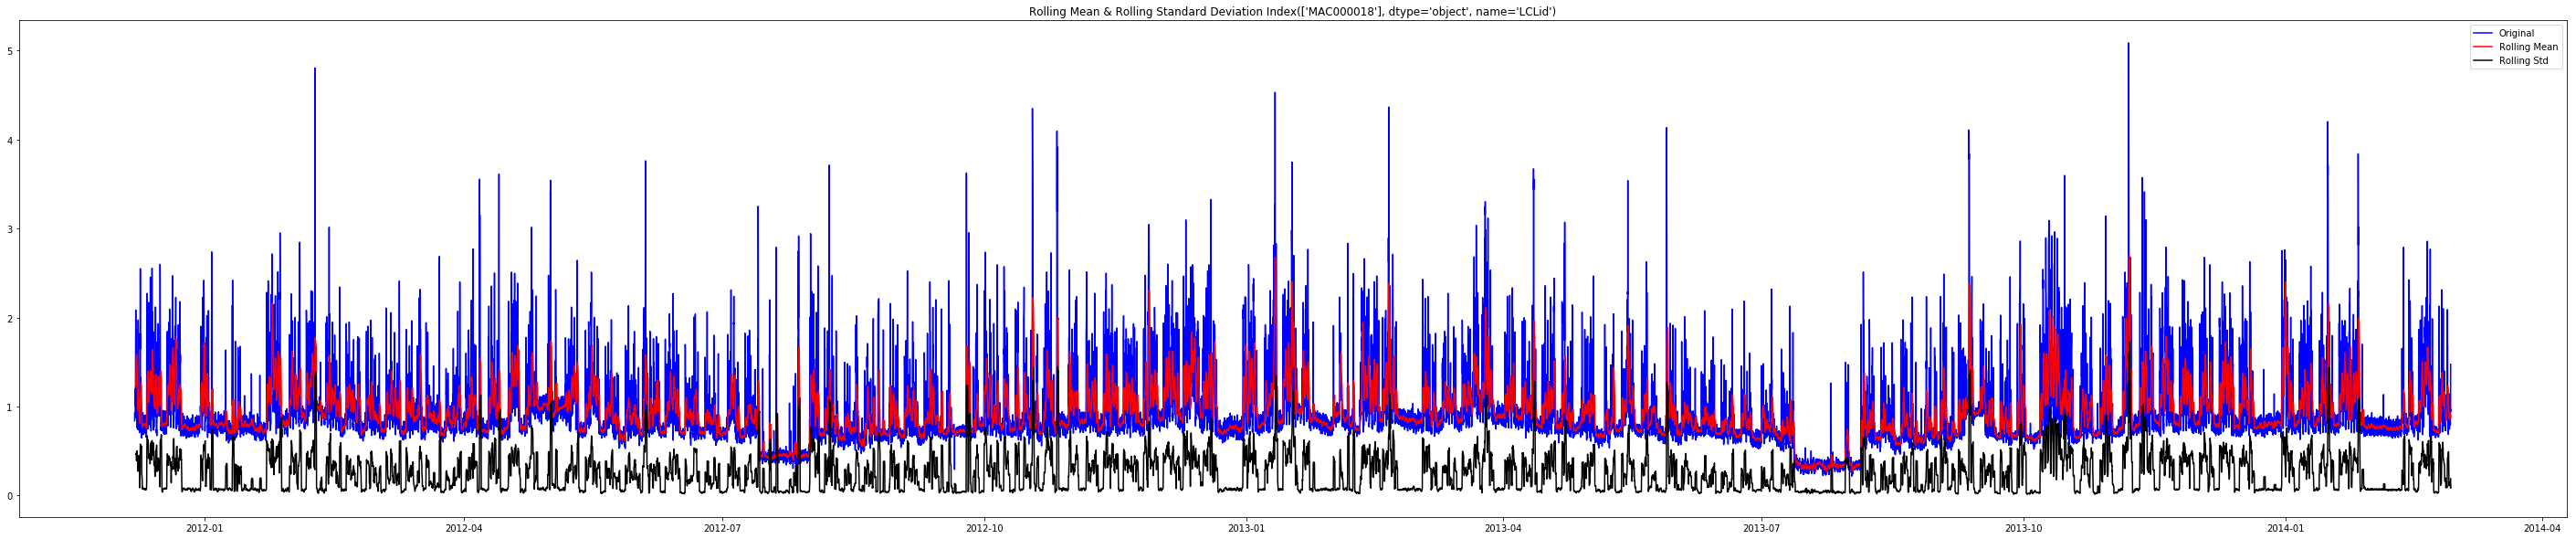

In [34]:
rolling_mean = third.rolling(window = 12).mean()
rolling_std = third.rolling(window = 12).std()
plt.figure(figsize=(50,10))
plt.plot(third['KWh'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation %s'%(first_label))
plt.show()

**Forecast using ARIMA**

In [35]:
#Importing Necessary Libraries
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import itertools
from random import random
from sklearn.metrics import mean_squared_error

In [36]:
#A Describe Function of Summary of fitting into ARIMA
def describe(file):
  model = ARIMA(file['KWh'], order=(2,1,0))
  model_fit = model.fit(disp=0)
  print(model_fit.summary())
  # plot residual errors
  residuals = pd.DataFrame(model_fit.resid)
  residuals.plot()
  plt.title("Residual Plot")
  plt.show()
  residuals.plot(kind='kde')
  plt.title("Probability Distribution Function")
  plt.show()
  print(residuals.describe())

In [37]:
#Plotting the Graph of PREDICTED Vs TEST
def errgraph(predictions,test):
  error = mean_squared_error(test, predictions)
  print('Test Mean Squared Error: %.3f' % error)
  # plot
  plt.figure(figsize=(50,10))
  plt.plot(test)
  plt.plot(predictions, color='red')
  plt.legend(['Data','Predicted'])
  plt.xlabel('Date')
  plt.ylabel('KWh Consumption')
  plt.show()

First House ID

                             ARIMA Model Results                              
Dep. Variable:                  D.KWh   No. Observations:                19527
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -176.976
Method:                       css-mle   S.D. of innovations              0.244
Date:                Sun, 25 Aug 2019   AIC                            361.951
Time:                        11:00:31   BIC                            393.470
Sample:                    12-07-2011   HQIC                           372.275
                         - 02-28-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.188e-05      0.001      0.017      0.987      -0.003       0.003
ar.L1.D.KWh    -0.1852      0.007    -26.225      0.000      -0.199      -0.171
ar.L2.D.KWh    -0.1618      0.007    -22.909    

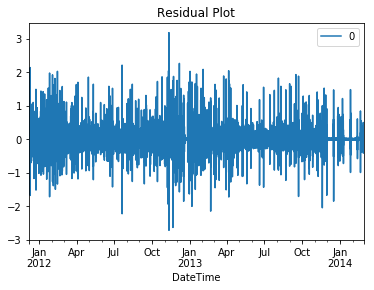

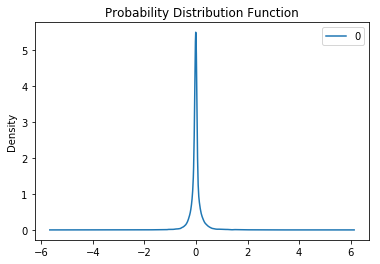

                  0
count  19527.000000
mean       0.000002
std        0.244180
min       -2.715983
25%       -0.054375
50%       -0.004534
75%        0.031124
max        3.184086


In [38]:
#Summary of Fitting into ARIMA
describe(first)

In [39]:
#Predicting USING ARIMA
X = first['KWh'].values
size = int(len(X) * 0.66) # Train size is 2/3rd of HouseID sample, Test size is last 1/3rd of HouseID sample
f_train, f_test = X[0:size], X[size:len(X)]
history = [x for x in f_train]
f_predictions = []
for t in range(500): #Predicting with Test only for 500 values for faster results, in order to see the whole result use **range(len(test))**
    model = ARIMA(history, order=(2,1,0))# order has lowest aic value
    f_model_fit = model.fit(disp=0)
    output = f_model_fit.forecast()
    yhat = output[0]
    f_predictions.append(yhat)
    obs = f_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f, count=%d' % (yhat, obs,t))

predicted=0.262727, expected=0.265000, count=0
predicted=0.269348, expected=0.254000, count=1
predicted=0.255433, expected=0.254000, count=2
predicted=0.255676, expected=0.271000, count=3
predicted=0.267583, expected=0.258000, count=4
predicted=0.257997, expected=0.258000, count=5
predicted=0.259982, expected=0.427000, count=6
predicted=0.393108, expected=0.361000, count=7
predicted=0.348369, expected=0.305000, count=8
predicted=0.326336, expected=0.293000, count=9
predicted=0.303977, expected=0.264000, count=10
predicted=0.271647, expected=0.284000, count=11
predicted=0.284423, expected=0.477000, count=12
predicted=0.435237, expected=0.764000, count=13
predicted=0.676947, expected=0.714000, count=14
predicted=0.680132, expected=0.558000, count=15
predicted=0.596960, expected=0.432000, count=16
predicted=0.481156, expected=0.218000, count=17
predicted=0.280168, expected=0.270000, count=18
predicted=0.292323, expected=0.277000, count=19
predicted=0.267633, expected=0.261000, count=20
pr

Index(['MAC000018'], dtype='object', name='LCLid')
Test Mean Squared Error: 0.014


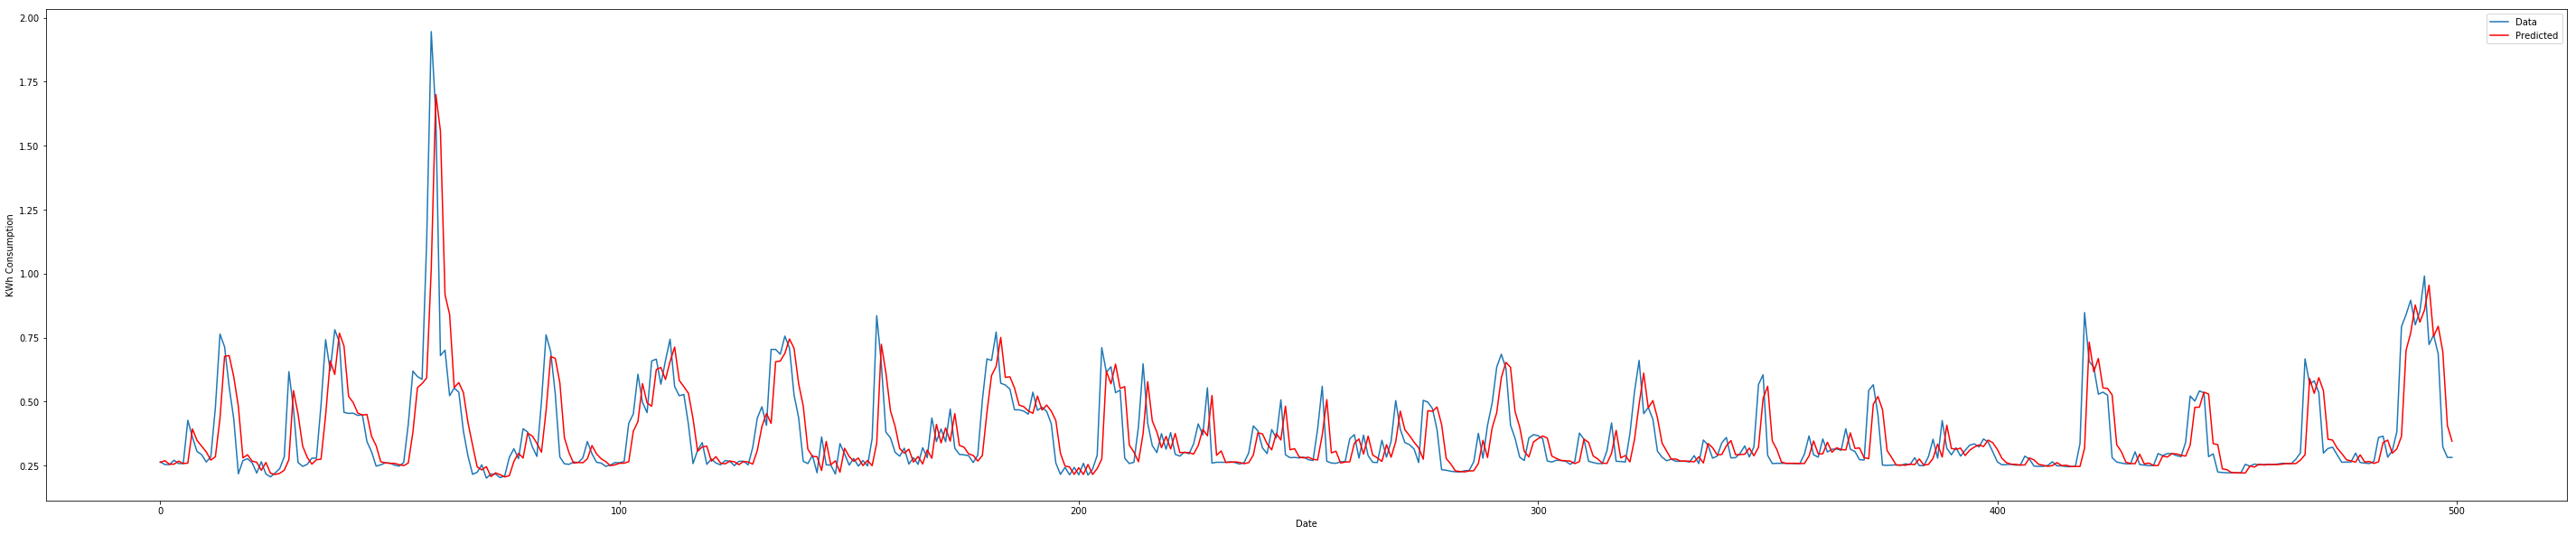

In [40]:
# Plotting Graph for prediction vs observed
print(first_label)
errgraph(f_predictions,f_test[:500]) # Since using only 500 for fast results, if needed use f_test fully for whole prediction when range is made as range(test) in the above cell

Second House ID

                             ARIMA Model Results                              
Dep. Variable:                  D.KWh   No. Observations:                19527
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 689.681
Method:                       css-mle   S.D. of innovations              0.234
Date:                Sun, 25 Aug 2019   AIC                          -1371.361
Time:                        11:03:00   BIC                          -1339.843
Sample:                    12-07-2011   HQIC                         -1361.038
                         - 02-28-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.391e-06      0.001     -0.009      0.993      -0.002       0.002
ar.L1.D.KWh    -0.3881      0.007    -55.338      0.000      -0.402      -0.374
ar.L2.D.KWh    -0.1994      0.007    -28.433    

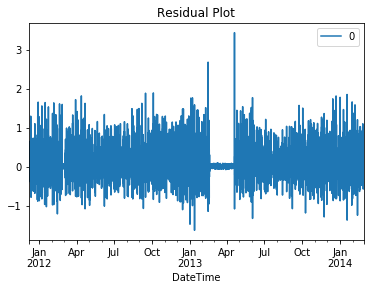

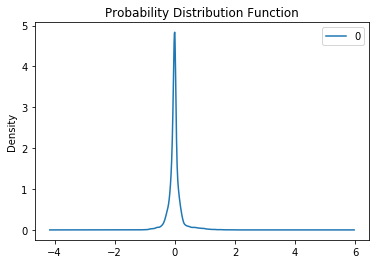

                  0
count  19527.000000
mean       0.000005
std        0.233579
min       -1.629279
25%       -0.075061
50%       -0.009676
75%        0.038787
max        3.434619


In [41]:
#Summary of Fitting into ARIMA
describe(second)

In [42]:
#Predicting USING ARIMA
X = second['KWh'].values
size = int(len(X) * 0.66) # Train size is 2/3rd of HouseID sample, Test size is last 1/3rd of HouseID sample
s_train, s_test = X[0:size], X[size:len(X)]
history = [x for x in s_train]
s_predictions = []
for t in range(500):# Predicting with Test only for 500 values for faster results, in order to see the whole result use **range(len(test))** 
    model = ARIMA(history, order=(2,1,0))# order has lowest aic value
    s_model_fit = model.fit(disp=0)
    output = s_model_fit.forecast()
    yhat = output[0]
    s_predictions.append(yhat)
    obs = s_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f, count=%d' % (yhat, obs,t))

predicted=0.535381, expected=0.248000, count=0
predicted=0.326012, expected=0.142000, count=1
predicted=0.276508, expected=0.114000, count=2
predicted=0.146274, expected=0.266000, count=3
predicted=0.211749, expected=0.142000, count=4
predicted=0.160299, expected=0.115000, count=5
predicted=0.150498, expected=0.126000, count=6
predicted=0.127061, expected=0.103000, count=7
predicted=0.109820, expected=0.116000, count=8
predicted=0.115469, expected=0.352000, count=9
predicted=0.256446, expected=0.351000, count=10
predicted=0.304021, expected=0.361000, count=11
predicted=0.357265, expected=0.375000, count=12
predicted=0.367483, expected=0.130000, count=13
predicted=0.223645, expected=0.117000, count=14
predicted=0.171265, expected=0.116000, count=15
predicted=0.118975, expected=0.108000, count=16
predicted=0.111322, expected=0.103000, count=17
predicted=0.106545, expected=0.109000, count=18
predicted=0.107612, expected=0.120000, count=19
predicted=0.114437, expected=0.116000, count=20
pr

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.133867, expected=0.117000, count=196
predicted=0.117594, expected=0.097000, count=197
predicted=0.104464, expected=0.168000, count=198
predicted=0.143976, expected=0.170000, count=199
predicted=0.154873, expected=0.217000, count=200
predicted=0.198023, expected=0.431000, count=201
predicted=0.337037, expected=0.255000, count=202
predicted=0.281336, expected=0.381000, count=203
predicted=0.366733, expected=0.392000, count=204
predicted=0.362258, expected=0.301000, count=205
predicted=0.334712, expected=0.104000, count=206
predicted=0.200107, expected=0.107000, count=207
predicted=0.145503, expected=0.114000, count=208
predicted=0.110603, expected=0.122000, count=209
predicted=0.117403, expected=0.102000, count=210
predicted=0.108254, expected=0.109000, count=211
predicted=0.110239, expected=0.116000, count=212
predicted=0.111797, expected=0.348000, count=213
predicted=0.254989, expected=0.128000, count=214
predicted=0.168071, expected=0.140000, count=215
predicted=0.179592, 

Index(['MAC000020'], dtype='object', name='LCLid')
Test Mean Squared Error: 0.061


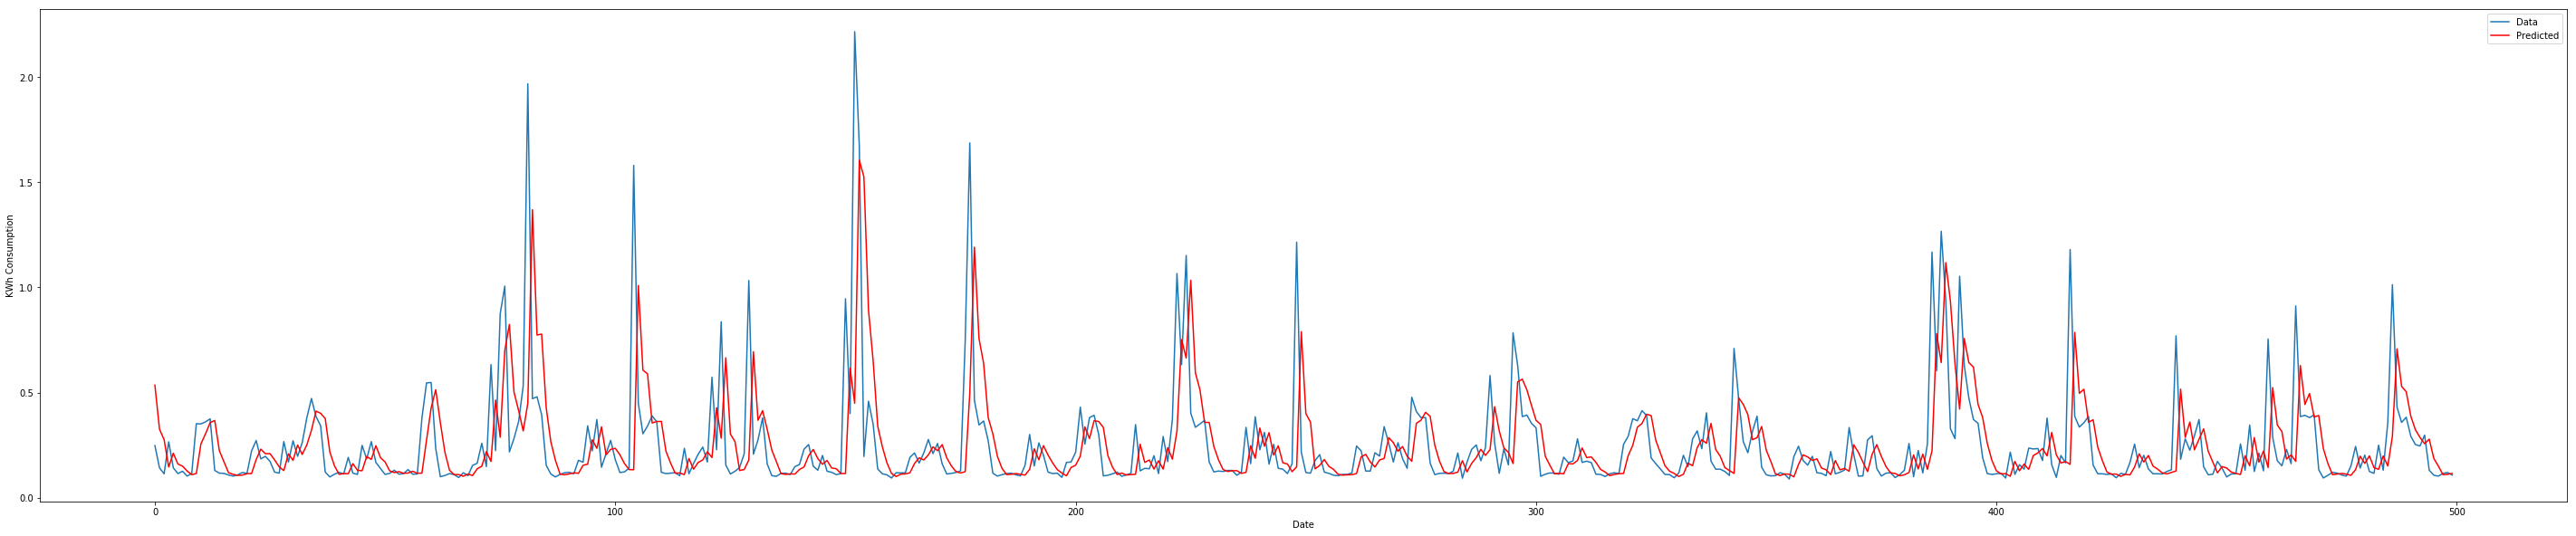

In [43]:
# Plotting Graph for prediction vs observed
print(second_label)
errgraph(s_predictions,s_test[:500])# Since using only 500 for fast results, if needed use s_test fully for whole prediction when range is made as range(test) in the above cell

Third House ID

                             ARIMA Model Results                              
Dep. Variable:                  D.KWh   No. Observations:                19526
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -4214.858
Method:                       css-mle   S.D. of innovations              0.300
Date:                Sun, 25 Aug 2019   AIC                           8437.716
Time:                        11:05:54   BIC                           8469.234
Sample:                    12-07-2011   HQIC                          8448.039
                         - 02-28-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.679e-05      0.002      0.015      0.988      -0.003       0.003
ar.L1.D.KWh    -0.1213      0.007    -17.045      0.000      -0.135      -0.107
ar.L2.D.KWh    -0.1083      0.007    -15.222    

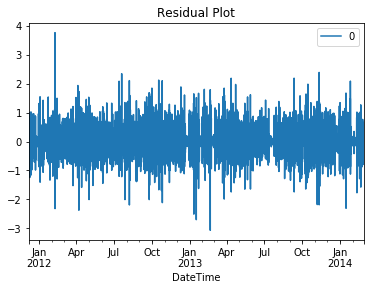

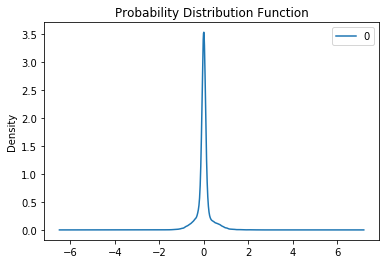

                  0
count  19526.000000
mean       0.000001
std        0.300275
min       -3.072088
25%       -0.076837
50%       -0.005332
75%        0.066238
max        3.768640


In [44]:
#Summary of Fitting into ARIMA
describe(third)

In [45]:
#Predicting USING ARIMA
X = third['KWh'].values
size = int(len(X) * 0.66)# Train size is 2/3rd of HouseID sample, Test size is last 1/3rd of HouseID sample
t_train, t_test = X[0:size], X[size:len(X)]
history = [x for x in t_train]
t_predictions = []
for t in range(500):# Predicting with Test only for 500 values for faster results, in order to see the whole result use **range(len(test))**
    model = ARIMA(history, order=(2,1,0))# order has lowest aic value
    t_model_fit = model.fit(disp=0)
    output = t_model_fit.forecast()
    yhat = output[0]
    t_predictions.append(yhat)
    obs = t_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f, count=%d' % (yhat, obs,t))

predicted=0.693921, expected=0.752000, count=0
predicted=0.740575, expected=0.583000, count=1
predicted=0.602028, expected=0.665000, count=2
predicted=0.672452, expected=0.614000, count=3
predicted=0.612027, expected=0.697000, count=4
predicted=0.690537, expected=0.678000, count=5
predicted=0.671138, expected=0.701000, count=6
predicted=0.699766, expected=0.676000, count=7
predicted=0.677033, expected=0.711000, count=8
predicted=0.708675, expected=0.638000, count=9
predicted=0.644799, expected=0.687000, count=10
predicted=0.688180, expected=0.668000, count=11
predicted=0.665104, expected=0.674000, count=12
predicted=0.675302, expected=0.587000, count=13
predicted=0.599268, expected=0.678000, count=14
predicted=0.674538, expected=0.693000, count=15
predicted=0.680128, expected=0.683000, count=16
predicted=0.682727, expected=0.704000, count=17
predicted=0.702015, expected=0.578000, count=18
predicted=0.594344, expected=0.736000, count=19
predicted=0.727083, expected=0.695000, count=20
pr

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.003659, expected=1.124000, count=223
predicted=1.080601, expected=0.776000, count=224
predicted=0.817880, expected=0.726000, count=225
predicted=0.773045, expected=0.760000, count=226
predicted=0.760754, expected=1.442000, count=227
predicted=1.338860, expected=0.965000, count=228
predicted=0.956577, expected=0.980000, count=229
predicted=1.032367, expected=0.782000, count=230
predicted=0.809152, expected=0.675000, count=231
predicted=0.713204, expected=0.746000, count=232
predicted=0.747862, expected=0.765000, count=233
predicted=0.754109, expected=0.723000, count=234
predicted=0.726940, expected=0.714000, count=235
predicted=0.720097, expected=0.777000, count=236
predicted=0.768835, expected=0.772000, count=237
predicted=0.765523, expected=0.948000, count=238
predicted=0.922919, expected=0.742000, count=239
predicted=0.751921, expected=0.937000, count=240
predicted=0.932097, expected=0.807000, count=241
predicted=0.803687, expected=0.696000, count=242
predicted=0.727025, 

Index(['MAC000021'], dtype='object', name='LCLid')
Test Mean Squared Error: 0.066


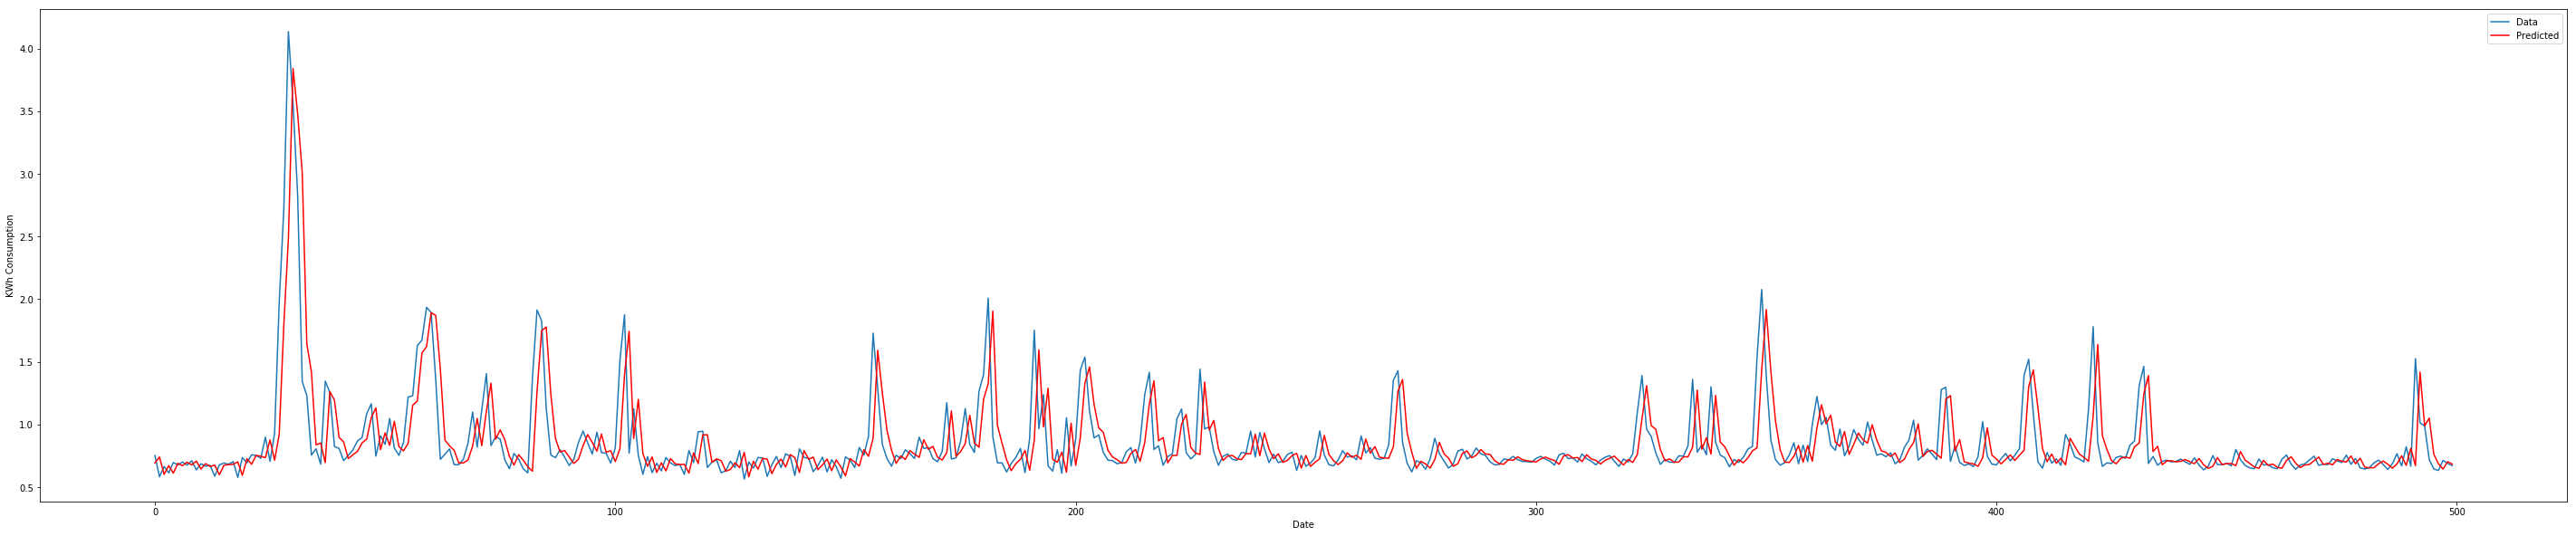

In [46]:
# Plotting Graph for prediction vs observed
print(third_label)
errgraph(t_predictions,t_test[:500])# Since using only 500 for fast results, if needed use t_test fully for whole prediction when range is made as range(test) in the above cell

Since ARIMA takes a lot of time to process and forecast the whole data going for Seasonal ARIMA (SARIMAX)

**SARIMAX FORECAST**

FIRST HOUSE ID

In [47]:
#Reading only the KWh consumption into y
y = first['KWh'].resample('h').mean()# HoURLY BASIS

In [48]:
#The first five rows
print(y.head())

DateTime
2011-12-07 09:00:00    0.303
2011-12-07 10:00:00    0.418
2011-12-07 11:00:00    0.419
2011-12-07 12:00:00    0.677
2011-12-07 13:00:00    1.335
Freq: H, Name: KWh, dtype: float64


In [49]:
#The last five rows
print(y.tail())

DateTime
2014-02-27 20:00:00    0.474
2014-02-27 21:00:00    0.798
2014-02-27 22:00:00    0.755
2014-02-27 23:00:00    0.765
2014-02-28 00:00:00    0.760
Freq: H, Name: KWh, dtype: float64


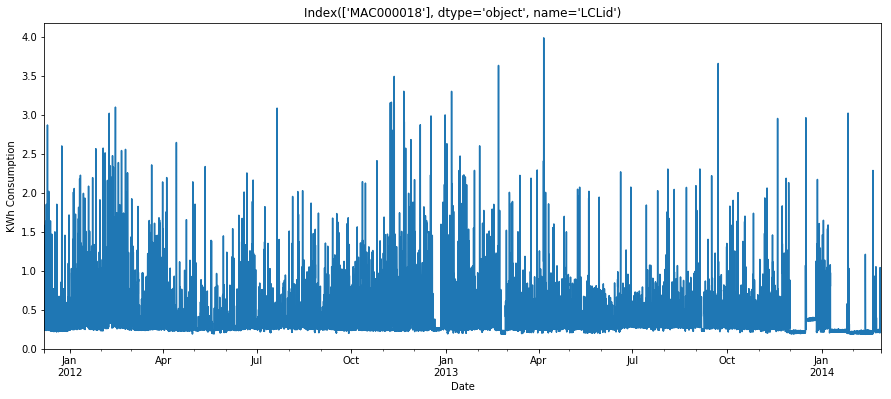

In [50]:
#Plotting the dataset
ax=y.plot(figsize=(15, 6))
ax.set_xlabel('Date')
ax.set_ylabel('KWh Consumption')
plt.title(first_label)
plt.show()

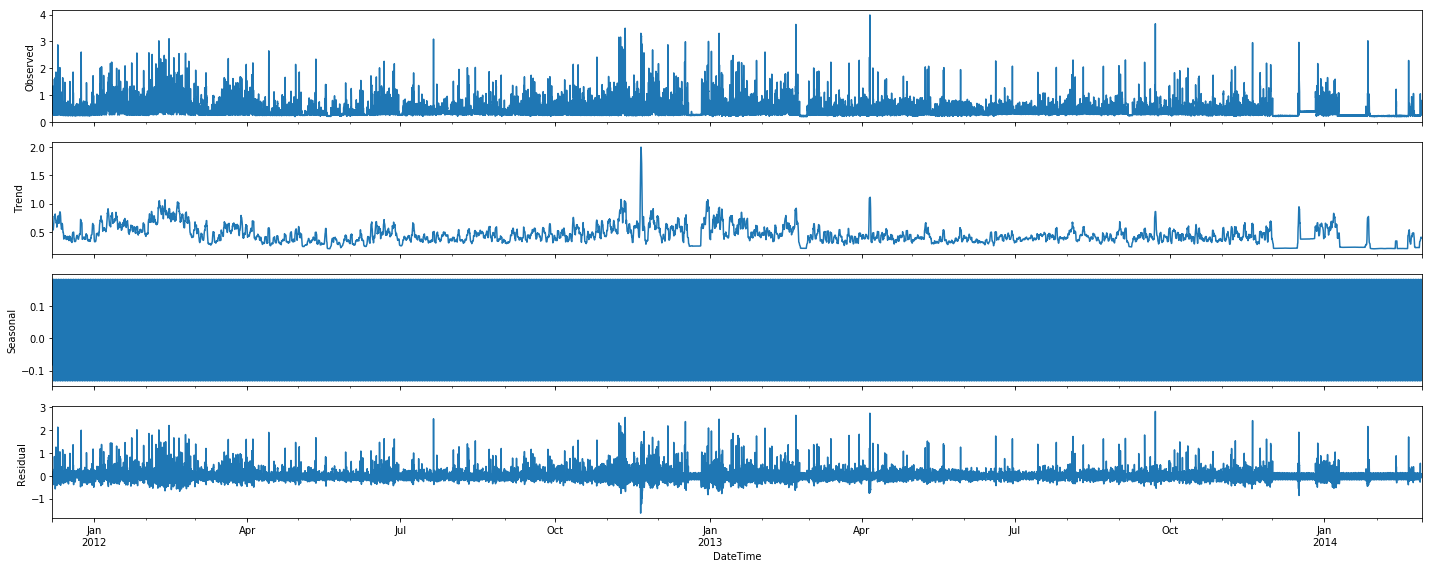

In [51]:
#Seasonal Decomposition plot
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [52]:
#Fitting the model and Showing Summary
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2,1,0),# order has lowest aic value
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1852      0.003    -69.202      0.000      -0.190      -0.180
ar.L2         -0.1618      0.003    -47.259      0.000      -0.168      -0.155
sigma2         0.0596      0.000    317.935      0.000       0.059       0.060


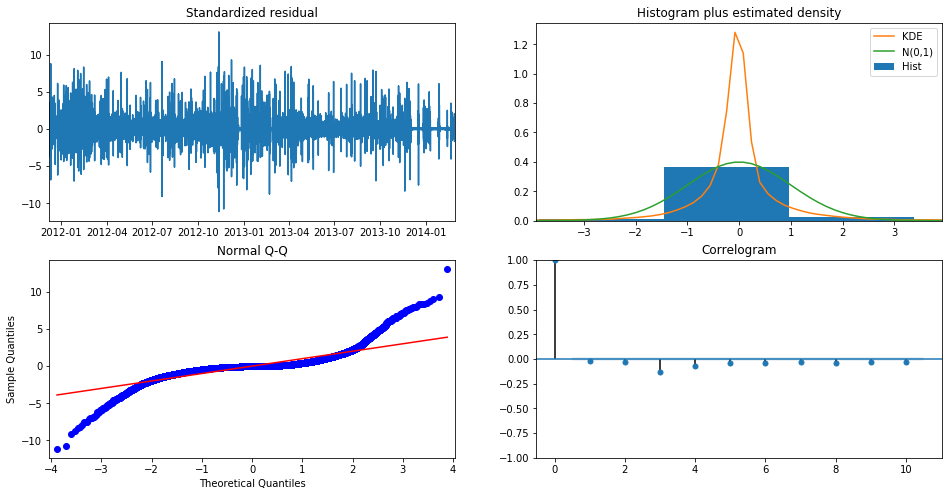

In [53]:
#Diagonstics Plot
results.plot_diagnostics(figsize=(16, 8))
plt.show()

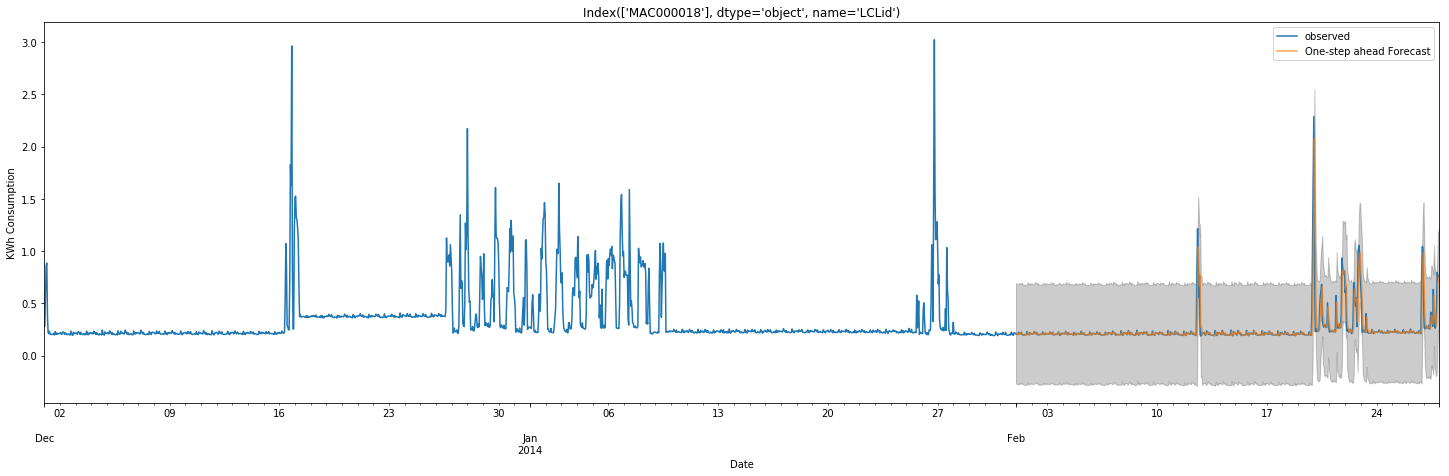

In [54]:
#FORECASTING THE PREDICTED VALUES
pred = results.get_prediction(start=pd.to_datetime('2014-02-01'), dynamic=False)#Starting forecasting from February 2014
pred_ci = pred.conf_int()
ax = y['2013-12':].plot(label='observed')#Showing from December 2013
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(25, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('KWh Consumption')
plt.title(first_label)
plt.legend()
plt.show()

In [55]:
#Mean Squared Error
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.01


In [56]:
#Root Mean Squared Error
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.11


SECOND HOUSE ID

In [57]:
#Reading only the KWh consumption into y
y= second['KWh'].resample('h').mean()# HOURLY BASIS

In [58]:
#The first five rows
print(y.head())

DateTime
2011-12-07 09:00:00    0.275
2011-12-07 10:00:00    0.435
2011-12-07 11:00:00    0.511
2011-12-07 12:00:00    0.274
2011-12-07 13:00:00    0.484
Freq: H, Name: KWh, dtype: float64


In [59]:
#The last five rows
print(y.tail())

DateTime
2014-02-27 20:00:00    0.521
2014-02-27 21:00:00    0.461
2014-02-27 22:00:00    0.417
2014-02-27 23:00:00    0.133
2014-02-28 00:00:00    0.120
Freq: H, Name: KWh, dtype: float64


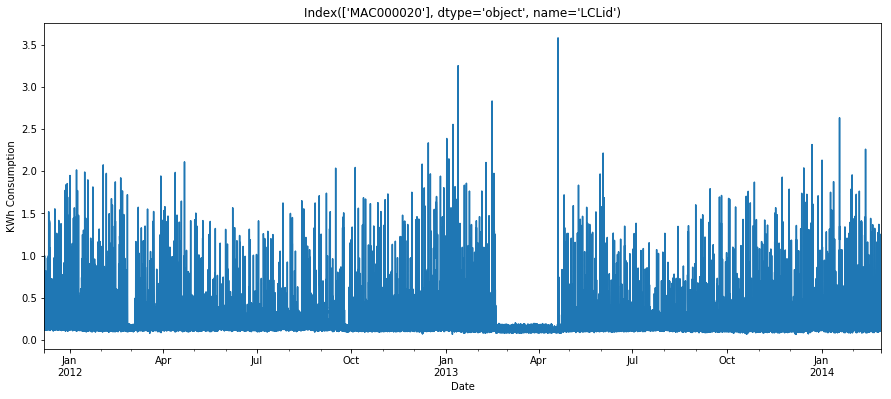

In [60]:
#Plotting the dataset
ax=y.plot(figsize=(15, 6))
ax.set_xlabel('Date')
ax.set_ylabel('KWh Consumption')
plt.title(second_label)
plt.show()

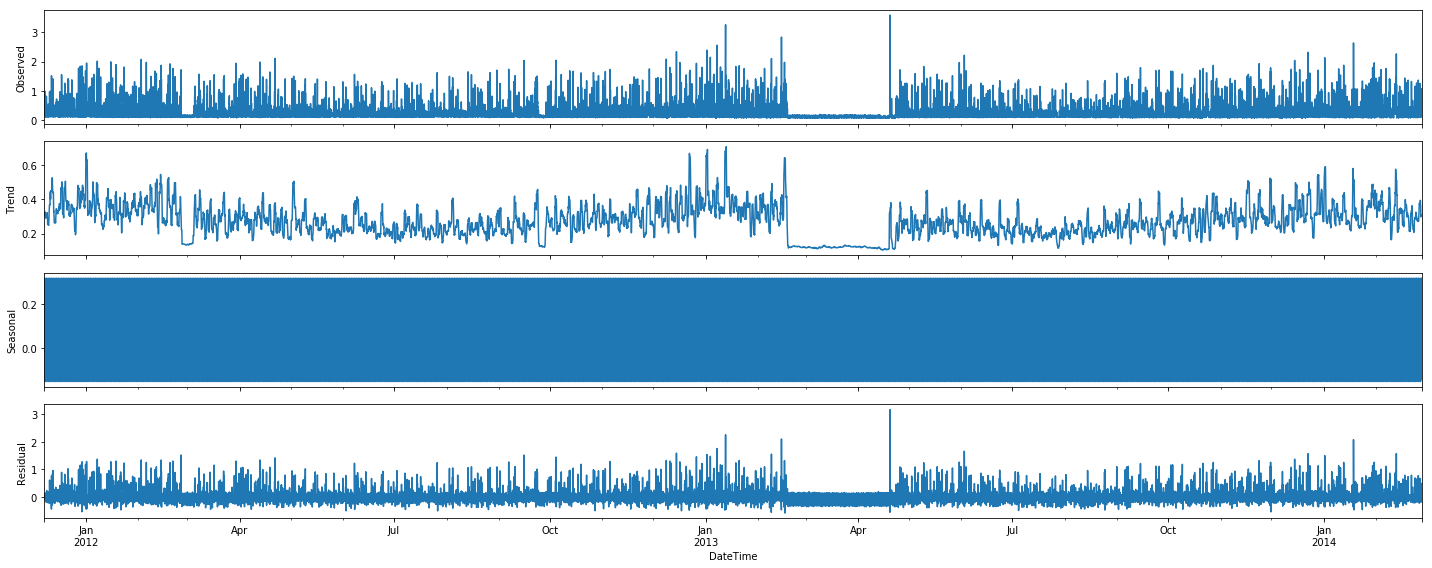

In [61]:
#Seasonal Decomposition plot
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [62]:
#Fitting the model and Showing Summary
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2,1,0),# order has lowest aic value
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3881      0.003   -115.239      0.000      -0.395      -0.381
ar.L2         -0.1994      0.004    -50.839      0.000      -0.207      -0.192
sigma2         0.0546      0.000    282.878      0.000       0.054       0.055


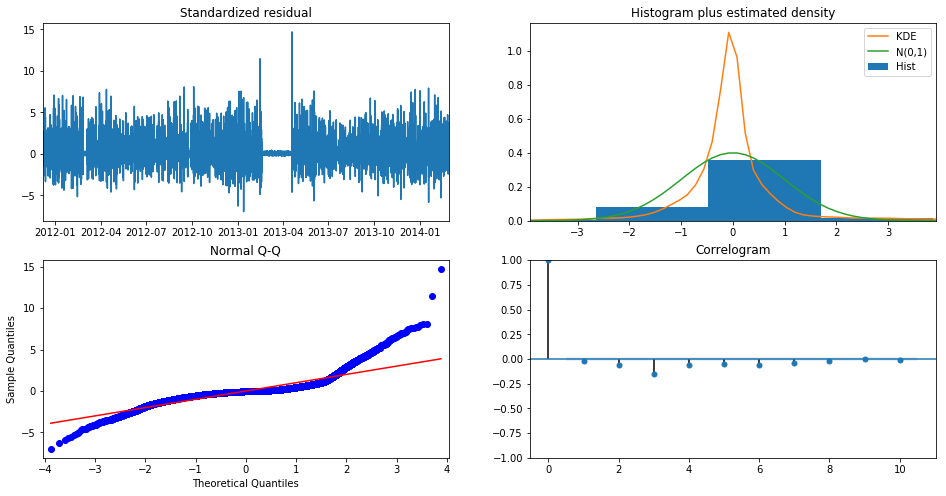

In [63]:
#Diagonstics Plot
results.plot_diagnostics(figsize=(16, 8))
plt.show()

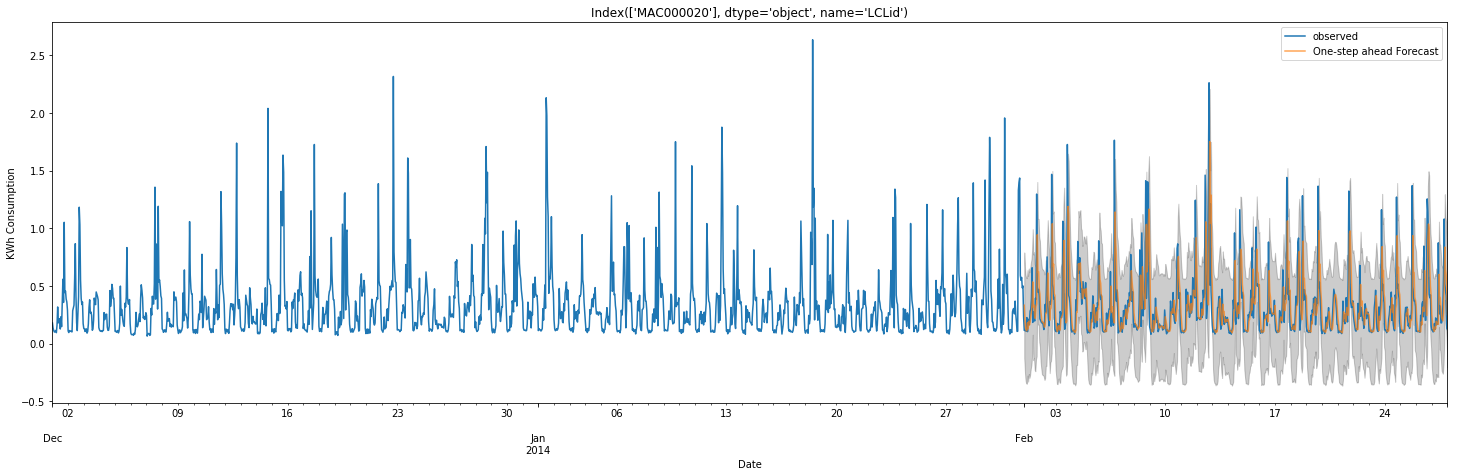

In [64]:
#FORECASTING THE PREDICTED VALUES
pred = results.get_prediction(start=pd.to_datetime('2014-02-01'), dynamic=False)#Starting forecasting from February 2014
pred_ci = pred.conf_int()
ax = y['2013-12':].plot(label='observed')#Showing from December 2013
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(25, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('KWh Consumption')
plt.title(second_label)
plt.legend()
plt.show()

In [65]:
#Mean Squared Error
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [66]:
#Root Mean Squared Error
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.26


THIRD HOUSE ID

In [67]:
#Reading only the KWh consumption into y
y = third['KWh'].resample('h').mean()

In [68]:
#The first five rows
print(y.head())

DateTime
2011-12-07 10:00:00    0.837
2011-12-07 11:00:00    0.929
2011-12-07 12:00:00    0.930
2011-12-07 13:00:00    0.872
2011-12-07 14:00:00    0.891
Freq: H, Name: KWh, dtype: float64


In [69]:
#The last five rows
print(y.tail())

DateTime
2014-02-27 20:00:00    0.904
2014-02-27 21:00:00    0.793
2014-02-27 22:00:00    0.975
2014-02-27 23:00:00    0.940
2014-02-28 00:00:00    1.474
Freq: H, Name: KWh, dtype: float64


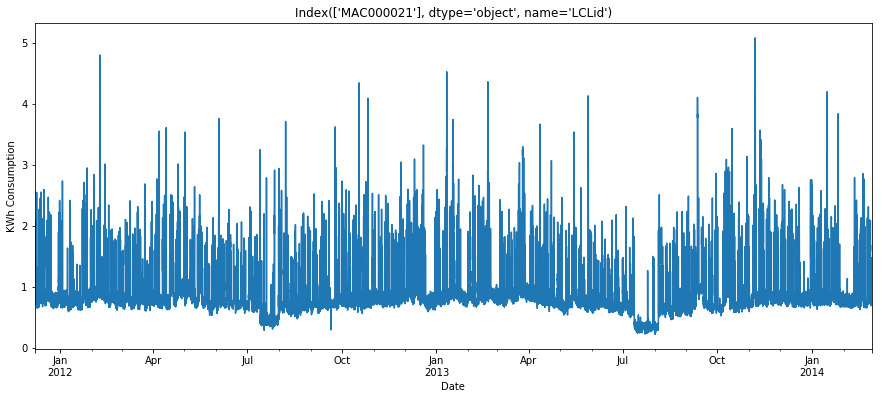

In [70]:
#Plotting the dataset
ax=y.plot(figsize=(15, 6))
ax.set_xlabel('Date')
ax.set_ylabel('KWh Consumption')
plt.title(third_label)
plt.show()

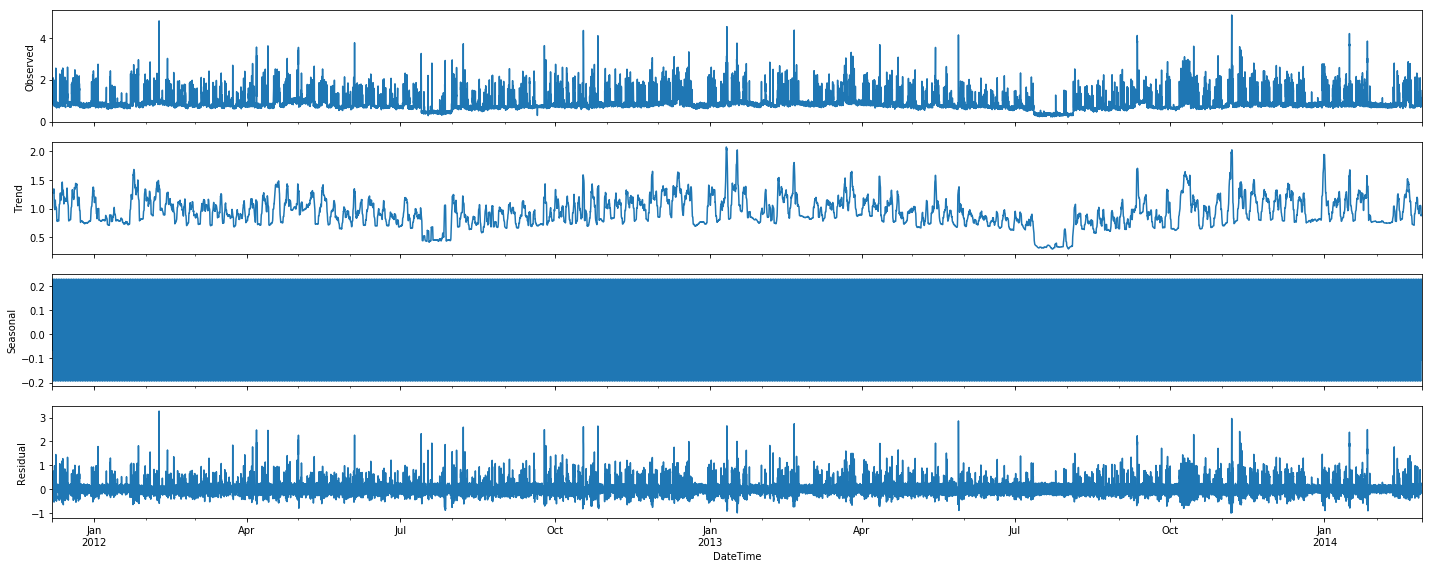

In [71]:
#Seasonal Decomposition plot
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [72]:
#Fitting the model and Showing Summary
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2,1,0),# order has lowest aic value
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1213      0.004    -32.140      0.000      -0.129      -0.114
ar.L2         -0.1083      0.004    -26.609      0.000      -0.116      -0.100
sigma2         0.0902      0.000    249.177      0.000       0.089       0.091


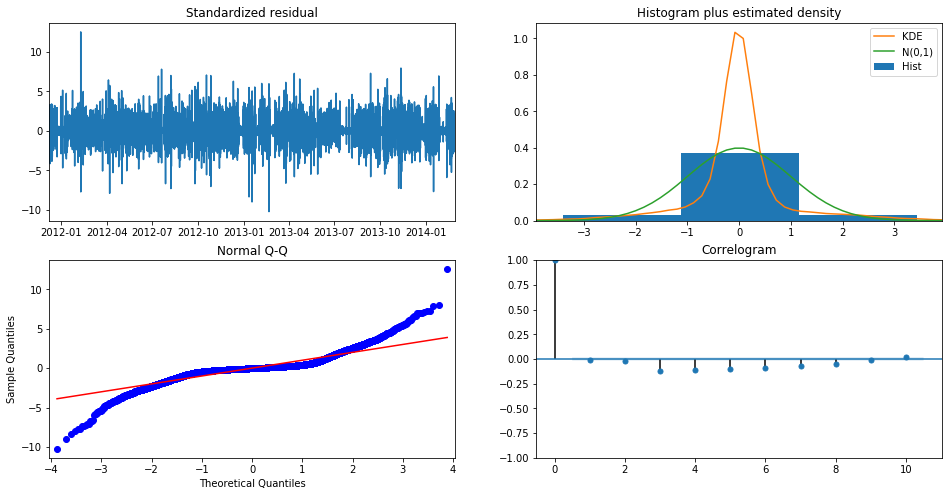

In [73]:
#Diagonstics Plot
results.plot_diagnostics(figsize=(16, 8))
plt.show()

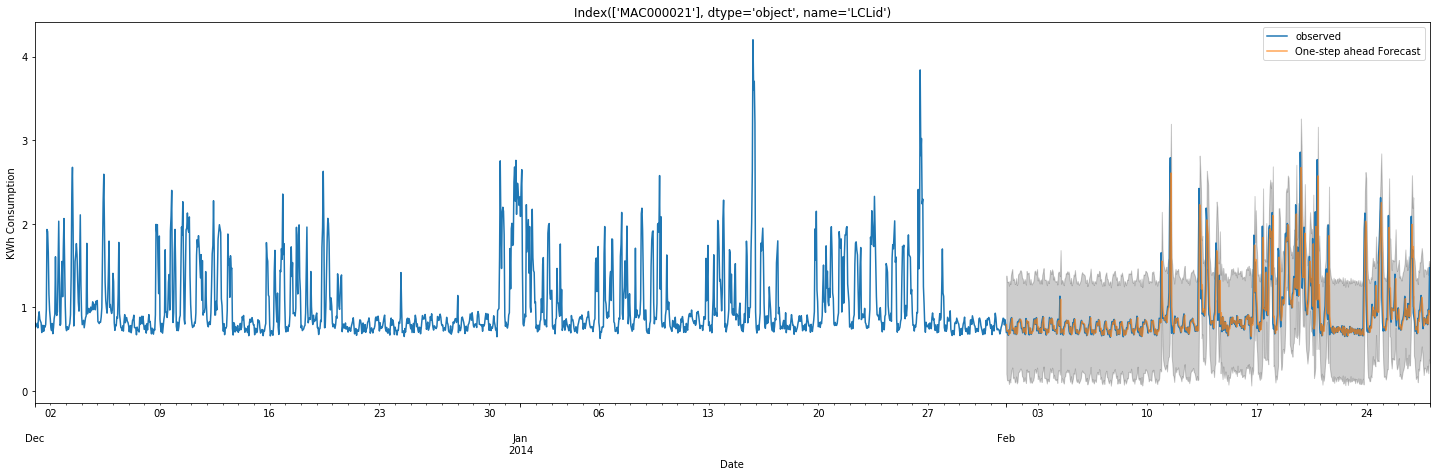

In [74]:
#FORECASTING THE PREDICTED VALUES
pred = results.get_prediction(start=pd.to_datetime('2014-02-01'), dynamic=False)#Starting forecasting from February 2014
pred_ci = pred.conf_int()
ax = y['2013-12':].plot(label='observed')#Showing from December 2013
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(25, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('KWh Consumption')
plt.title(third_label)
plt.legend()
plt.show()

In [75]:
#Mean Squared Error
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [76]:
#Root Mean Squared Error
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.27
